 **Name-Siddhika Rakshe**

**Class-BE CSE IS2**

**Roll no-2173199**

**Aim**- Introduction to Keras and Tensorflow (Optional – Pytorch). Configure and use google colab and kaggle GPU.

**Objectives**: 
1. To configure anaconda and google colab, kaggle environment
2. To Explore TF/Keras/Pytorch libraries
3. To learn to use GPU/TPU
4. To learn and understand Git


**Theory-**
1.	Keras/TF/Pytorch configuration steps
Set up your environment.
    Install Keras.
    Import libraries and modules.
     Load image data from MNIST.
     Preprocess input data for Keras.
Preprocess class labels for Keras.
Define model architecture.
Compile model.
Fit model on training data.
Evaluate model on test data.

2. Google colab configuration steps and commands
Step 1 − Open the following URL in your browser − https://colab.research.google.com Your browser would display the following screen (assuming that you are logged into your Google Drive) 
Step 2 − Click on the NEW PYTHON 3 NOTEBOOK link at the bottom of the screen. A new notebook would open up as shown in the screen below.
           By default, the notebook uses the naming convention UntitledXX.ipynb
Entering Code
You will now enter a trivial Python code in the code window and execute it.
Enter the following two Python statements in the code window −
import time
print(time.ctime())

Executing Code
To execute the code, click on the arrow on the left side of the code window.
Adding Code Cells
To add more code to your notebook, select the following menu options −
Insert / Code Cell
Run All
To run the entire code in your notebook without an interruption, execute the following menu options −
Runtime / Reset and run all

Changing Cell Order
When your notebook contains a large number of code cells, you may come across situations where you would like to change the order of execution of these cells.


3.Git commands-

git init
This command turns a directory into an empty Git repository. This is the first step in creating a repository. After running git init, adding and committing files/directories is possible.
git add
Adds files in the to the staging area for Git. Before a file is available to commit to a repository, the file needs to be added to the Git index (staging area). There are a few different ways to use git add, by adding entire directories, specific files, or all unstaged files.
git commit
Record the changes made to the files to a local repository. For easy reference, each commit has a unique ID.
git status
This command returns the current state of the repository.



 **Dataset used**-diabetes dataset

**Implementation-**

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [34]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/diabetes_data.csv')
print(df.head())


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


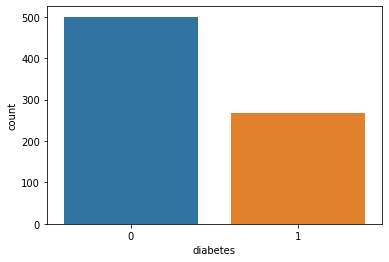

In [47]:
sns.countplot(x = 'diabetes',data = df)

             pregnancies   glucose  diastolic  ...       dpf       age  diabetes
pregnancies     1.000000  0.129459   0.141282  ... -0.033523  0.544341  0.221898
glucose         0.129459  1.000000   0.152590  ...  0.137337  0.263514  0.466581
diastolic       0.141282  0.152590   1.000000  ...  0.041265  0.239528  0.065068
triceps        -0.081672  0.057328   0.207371  ...  0.183928 -0.113970  0.074752
insulin        -0.073535  0.331357   0.088933  ...  0.185071 -0.042163  0.130548
bmi             0.017683  0.221071   0.281805  ...  0.140647  0.036242  0.292695
dpf            -0.033523  0.137337   0.041265  ...  1.000000  0.033561  0.173844
age             0.544341  0.263514   0.239528  ...  0.033561  1.000000  0.238356
diabetes        0.221898  0.466581   0.065068  ...  0.173844  0.238356  1.000000

[9 rows x 9 columns]


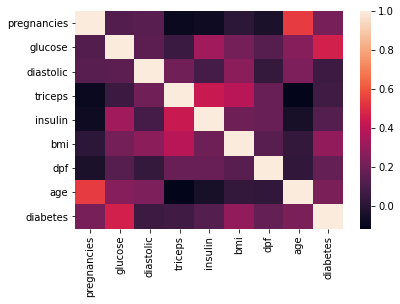

In [46]:

corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
diastolic,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
triceps,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


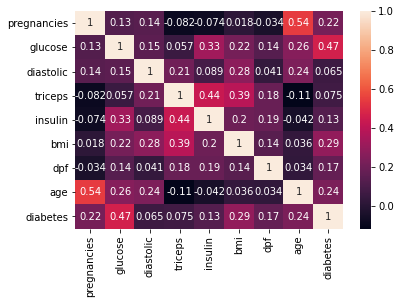

In [40]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

In [20]:
dfTrain = df[:650]
dfTest = df[650:750]
dfCheck = df[750:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
trainLabel = np.asarray(dfTrain['diabetes'])
trainData = np.asarray(dfTrain.drop('diabetes',1))
testLabel = np.asarray(dfTest['diabetes'])
testData = np.asarray(dfTest.drop('diabetes',1))

In [23]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

In [24]:
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [25]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


**Conclusion**- Hence we learn how to set up and use Kaggle, Colab,Tensorlfow Keras and GITHUB